In [2]:
import pandas as pd
data = pd.read_csv("../datasets/projects.csv")

In [3]:
data

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


In [4]:
switch = {
  1 : 0,
  0 : 1
}

data['finished'] = data['unfinished'].map(switch)
data

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
...,...,...,...,...
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1


### Visualização dos Dados com `seaborn.scatterplot`

**Por que usar um scatter plot?**  
O gráfico de dispersão é útil para identificar padrões ou tendências entre duas variáveis, como correlação ou agrupamentos. A adição de uma variável categórica com `hue` permite uma melhor visualização de como diferentes categorias se comportam.

Nesta parte do código, o gráfico ajuda a ver a relação entre as horas esperadas (`expected_hours`) e o preço (`price`), com uma diferenciação visual por meio da variável `finished`.


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

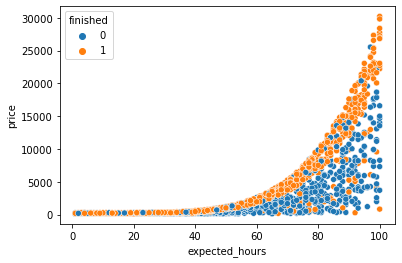

In [5]:
import seaborn as sns

sns.scatterplot(x='expected_hours', y='price', hue='finished', data=data)

In [6]:
x = data[['expected_hours',	'price']]
y = data['finished']

In [88]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


model = LinearSVC(random_state=20)


In [100]:
SEED = 20
x_train,x_test,y_train,y_test = train_test_split(x, y,random_state=20, test_size = 0.25, stratify=y)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"a acurácia do modelo foi de {accuracy:.2f}%")


a acurácia do modelo foi de 0.47%


c:\Users\mathi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Acurácia da Linha de Base

Neste código, criamos uma linha de base que faz previsões constantes para todas as amostras do conjunto de teste. A linha de base é usada para comparar o desempenho de modelos mais sofisticados.

- **`np.ones(540)`**: Cria um array de tamanho 540, preenchido com 1, simulando uma previsão constante de que todas as amostras pertencem à classe 1.
  
- **`accuracy_score(y_test, base_line)`**: Calcula a acurácia comparando as previsões da linha de base com os rótulos reais (`y_test`). A acurácia será a proporção de exemplos que pertencem à classe 1, pois essa é a única previsão feita pela linha de base.

Este método é útil para verificar se o modelo de machine learning está realmente aprendendo padrões nos dados ou se seu desempenho não é muito melhor do que uma previsão trivial, como sempre prever a mesma classe.


In [101]:
import numpy as np
base_line = np.ones(540)
accuracy = accuracy_score(y_test, base_line)
print(f"a acurácia da linha de base foi de {accuracy:.2f}%")

a acurácia da linha de base foi de 0.53%


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

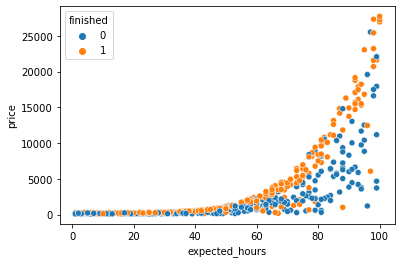

In [102]:
sns.scatterplot(x='expected_hours', y='price', hue=y_test, data=x_test)

### Visualização da Superfície de Decisão com `matplotlib`

Os trechos de código a seguir visa gerar e visualizar a superfície de decisão de um modelo de classificação, mostrando como o modelo separa diferentes classes com base em duas variáveis (`expected_hours` e `price`).

- **Definição dos Eixos**:
  - **`x_min`, `x_max`**: Valores mínimo e máximo da variável `expected_hours`.
  - **`y_min`, `y_max`**: Valores mínimo e máximo da variável `price`.
  - **`pixels = 100`**: Define a resolução da malha utilizada para gerar a superfície de decisão.
  - **`axis_x`, `axis_y`**: Criam eixos uniformemente espaçados entre os valores mínimos e máximos com base na quantidade de pixels.
  
- **`np.meshgrid()`**: Gera uma grade de coordenadas (x, y) a partir dos valores dos eixos, essencial para mapear pontos em duas dimensões.

- **`points = np.c_[xx.ravel(), yy.ravel()]`**: Cria um array de pontos que combina todas as coordenadas x e y da malha, necessário para fazer previsões no espaço bidimensional.

- **`Z = model.predict(points)`**: Faz previsões para cada ponto na malha, criando a superfície de decisão. O array `Z` é então remodelado para corresponder ao formato da malha (`xx.shape`).

- **`plt.contourf()`**: Plota a superfície de decisão com cores que indicam a região de cada classe prevista pelo modelo.

- **`plt.scatter()`**: Plota os pontos reais do conjunto de teste (`x_test.expected_hours`, `x_test.price`) com suas respectivas classes (`y_test`) para comparar a distribuição real com a superfície de decisão.

**Objetivo**: A visualização final mostra a **superfície de decisão** gerada pelo modelo, permitindo verificar como ele separa as classes com base nas variáveis `expected_hours` e `price`. Isso é especialmente útil para entender como o modelo generaliza suas previsões em novos dados.


In [103]:
x_min = x_test.expected_hours.min()
x_max = x_test.expected_hours.max()
y_min = x_test.price.min()
y_max = x_test.price.max()

print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [104]:
pixels = 100

axis_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
axis_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

In [105]:
xx, yy = np.meshgrid(axis_x, axis_y)
points = np.c_[xx.ravel(), yy.ravel()]
points

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [106]:
Z = model.predict(points)
Z = Z.reshape(xx.shape)

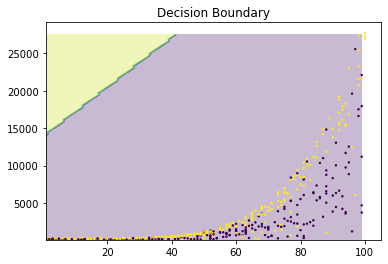

In [108]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha = 0.3)
plt.title("Decision Boundary")
plt.scatter(x_test.expected_hours, x_test.price,c=y_test, s=2)

### Avaliação da Superfície de Decisão Gerada pelo SVC Linear

A superfície de decisão gerada por um **SVC linear** (Support Vector Classifier) foi plotada, mas ela parece não capturar bem a complexidade do problema. Existem várias instâncias mal classificadas, especialmente próximas às bordas entre as classes.

Essa observação sugere que:

- **Subclassificação nas bordas**: As instâncias próximas à borda entre as classes são as mais difíceis de classificar corretamente, e o modelo linear pode não ser flexível o suficiente para ajustar essas regiões de forma precisa.
  
- **Modelo linear**: O **SVC linear** assume que as classes podem ser separadas por uma reta ou um plano. No entanto, se as classes forem separadas de forma mais complexa, um modelo linear pode ter dificuldades em capturar essas nuances.

- **melhoria**: Um **modelo mais complexo**, como um SVC com **kernel não linear** (por exemplo, kernel polinomial ou RBF), pode ser mais adequado para capturar a estrutura complexa do problema. Esses modelos permitem uma separação mais flexível entre as classes, adaptando-se melhor aos padrões dos dados.



In [121]:
from sklearn.svm import SVC

model = SVC(random_state=SEED, kernel="rbf")
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"a acurácia do modelo foi de {accuracy:.2f}%")


a acurácia do modelo foi de 0.53%


In [122]:

Z = model.predict(points)
Z = Z.reshape(xx.shape)

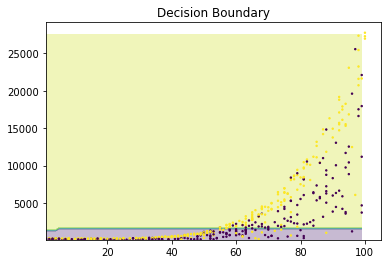

In [123]:
plt.contourf(xx, yy, Z, alpha = 0.3)
plt.title("Decision Boundary")
plt.scatter(x_test.expected_hours, x_test.price,c=y_test, s=2)

### Problema com o Escalonamento dos Dados e Impacto no SVC com Kernel Não Linear

Após utilizar um **SVC com kernel não linear (RBF)**, os resultados ainda não foram satisfatórios. A superfície de decisão gerada continua sendo bastante linear, o que não condiz com a complexidade dos nossos dados. Uma possível causa para isso é o **escalonamento inadequado dos dados**.

#### Sensibilidade do Kernel RBF ao Escalonamento
O **SVC com kernel RBF** é extremamente sensível ao escalonamento dos dados. Se as variáveis não forem corretamente escalonadas, o modelo pode não funcionar de maneira ideal e acabar se comportando de forma estranha, mesmo com um kernel não linear que, em teoria, deveria capturar padrões mais complexos.

#### Análise do Escalonamento Atual
- **Eixo x (expected_hours)**: Os valores vão de 0 a 100.
- **Eixo y (price)**: Os valores vão de 0 a 25.000.

Essa grande diferença de escala entre os eixos sugere que os dados não estão adequadamente escalonados, o que faz com que o modelo não consiga explorar todo o potencial do kernel RBF. O kernel depende da distância entre os pontos, e escalas muito diferentes entre variáveis podem distorcer essa medida, afetando negativamente a performance.

#### Próximos Passos
Para corrigir esse problema, é essencial **escalonar os dados** de forma adequada, garantindo que as variáveis estejam na mesma faixa de valores. Isso pode ser feito usando técnicas como a **normalização** ou o **escalonamento Z-score**. Com o escalonamento adequado, esperamos que o SVC com kernel RBF produza uma superfície de decisão que reflita melhor a complexidade dos dados.


### Escalonamento dos Dados com `StandardScaler`

Para melhorar o desempenho do modelo SVC com kernel não linear (RBF), utilizamos o **escalonamento dos dados**. Isso é necessário para que o modelo trate todas as variáveis de forma adequada, dado que ele é sensível à diferença de escala entre os recursos.

- **`StandardScaler`**: O `StandardScaler` aplica o escalonamento usando a técnica de **normalização Z-score**, onde cada variável é transformada para ter **média 0** e **desvio padrão 1**. Isso garante que todas as variáveis estejam na mesma escala.
  
  - **`scaler.fit(x_train)`**: O escalonador é ajustado (fit) com base nos dados de treinamento. Isso significa que ele calcula a média e o desvio padrão de cada variável no conjunto de treino.
  - **`scaler.fit_transform(x_train)`**: Os dados de treinamento são transformados para a nova escala, utilizando os parâmetros calculados no fit.
  - **`scaler.fit_transform(x_test)`**: Os dados de teste também são escalonados com o mesmo método, mas atenção: devemos usar `scaler.transform(x_test)` para aplicar a mesma transformação do conjunto de treino, em vez de `fit_transform`. O uso correto evita a fuga de dados.

- **Ajuste do modelo e predições**:
  - Após o escalonamento, o modelo é treinado novamente com os dados escalonados (`train_x`) e testado no conjunto escalonado de teste (`test_x`).
 

**Importância do Escalonamento**:
O escalonamento é crucial para que o **SVC com kernel RBF** possa medir distâncias de forma apropriada entre os pontos. Isso garante que o modelo funcione corretamente, capturando padrões complexos nos dados, sem que uma variável domine a outra devido à diferença de escala.

Com os dados devidamente escalonados, a performance do modelo deve melhorar significativamente, como observado na acurácia final.


In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)
train_x = scaler.fit_transform(x_train)
test_x = scaler.fit_transform(x_test)

model.fit(train_x, y_train)
predictions = model.predict(test_x)
accuracy = accuracy_score(y_test, predictions)
print(f"a acurácia do modelo foi de {accuracy:.2f}%")


a acurácia do modelo foi de 0.69%


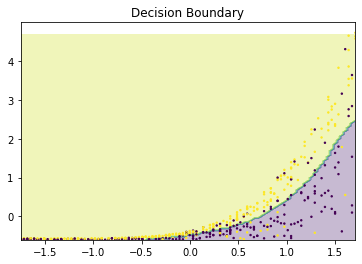

In [133]:
data_x = test_x[:,0]
data_y = test_x[:, 1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

axis_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
axis_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

xx, yy = np.meshgrid(axis_x, axis_y)
points = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.title("Decision Boundary")
plt.scatter(data_x, data_y,c=y_test, s=2)